<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW4_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 Problem 3
This code solves the thermodynamic efficiency of Fickett-Jacobs thermodynamic cycle for methane-oxygen at various values of equivalence ratio

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/SDToolbox/Python3/')
!pip install cantera
import sdtoolbox
import matplotlib.pyplot as plt
import cantera as ct
import numpy as np
from sdtoolbox.postshock import CJspeed, PostShock_fr, PostShock_eq
from sdtoolbox.utilities import CJspeed_plot, znd_plot, znd_fileout
from sdtoolbox.znd import zndsolve

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 47.8 MB/s eta 0:00:00


Iteration of C2H4-O2 reaction without precompression

Text(0, 0.5, 'Thermodynamic Efficiency')

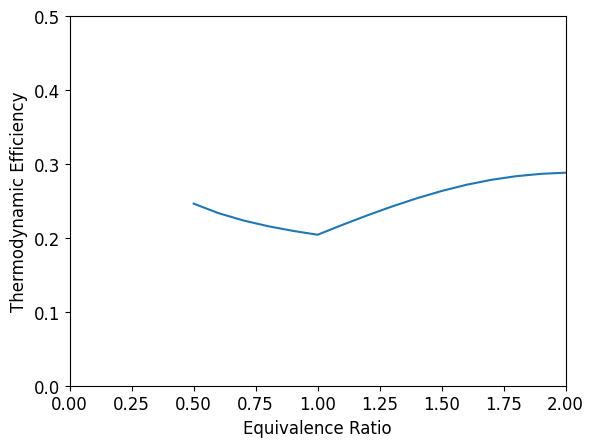

In [72]:
phi_vec = np.arange(.5,2.1,.1)
eta_vec = np.zeros(len(phi_vec))
for i in range(len(phi_vec)):
  # STATE 1
  gas = ct.Solution('gri30.yaml')
  P1 = 1*100000
  T1 = 300
  gas.TP = T1,P1
  phi = phi_vec[i]
  FUEL = 'C2H4'
  OXID = 'O2'
  gas.set_equivalence_ratio(phi,FUEL,OXID)
  h1 = gas.enthalpy_mass
  s1 = gas.entropy_mass

  # STATE 3
  mech = 'gri30.yaml'
  [cj_speed,R2,plot_data] = CJspeed(P1,T1,gas.X,mech,fullOutput=True)
  U_CJ = cj_speed
  gas3 = PostShock_eq(U_CJ,P1,T1,gas.X,mech)
  T3 = gas3.T
  P3 = gas3.P
  s3 = gas3.entropy_mass
  h3 = gas3.enthalpy_mass

  # STATE 4
  P4 = P3
  T4 = T3
  s4 = s3

  # STATE 5
  P5 = P1
  gas3.SP = s4,P5
  gas3.equilibrate('SP')
  T5 = gas3.T
  h5 = gas3.enthalpy_mass

  # STATE 6
  T6 = T1
  P6 = P5
  gas3.TP = T6,P6
  gas3.equilibrate('TP')
  h6 = gas3.enthalpy_mass

  # EFFICIENCY CALCULATION
  w_net = h1-h5
  q_c = h1-h6
  eta = (w_net/q_c)
  eta_vec[i] = eta

plt.plot(phi_vec,eta_vec)
plt.ylim([0,.5])
plt.xlim([0,2])
plt.xlabel('Equivalence Ratio')
plt.ylabel('Thermodynamic Efficiency')

Iteration of CH4-O2 reaction at 1*U_CJ with precompression

Text(0.5, 1.0, 'CH4-O2 at 1*U_{CJ}')

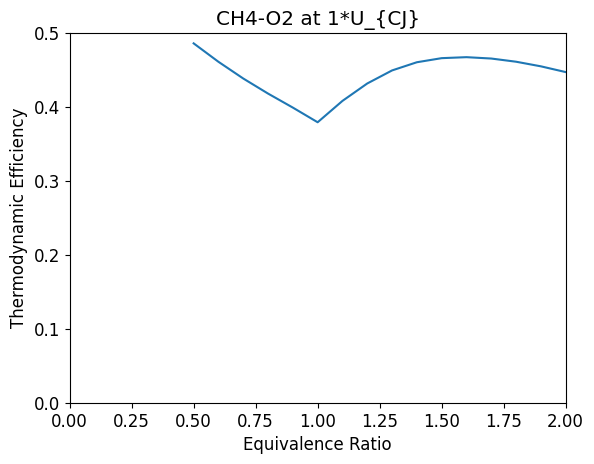

In [73]:
# CH4-O2 with precompression
phi_vec = np.arange(.5,2.1,.1)
eta_vec = np.zeros(len(phi_vec))
for i in range(len(phi_vec)):
  # STATE 1
  gas = ct.Solution('gri30.yaml')
  P1 = 1*100000
  T1 = 300
  gas.TP = T1,P1
  phi = phi_vec[i]
  FUEL = 'CH4'
  OXID = 'O2'
  gas.set_equivalence_ratio(phi,FUEL,OXID)
  h1 = gas.enthalpy_mass
  s1 = gas.entropy_mass
  X1 = gas.X

  # STATE 2
  P2 = 10*100000
  gas.SP = s1,P2
  gas.equilibrate('SP')
  T2 = gas.T
  s2 = gas.entropy_mass

  # STATE 3
  mech = 'gri30.yaml'
  [cj_speed,R2,plot_data] = CJspeed(P2,T2,X1,mech,fullOutput=True)
  U_CJ = cj_speed
  gas3 = PostShock_eq(U_CJ,P2,T2,X1,mech)
  T3 = gas3.T
  P3 = gas3.P
  s3 = gas3.entropy_mass
  h3 = gas3.enthalpy_mass

  # STATE 4
  P4 = P3
  T4 = T3
  s4 = s3

  # STATE 5
  P5 = P1
  gas3.SP = s4,P5
  gas3.equilibrate('SP')
  T5 = gas3.T
  h5 = gas3.enthalpy_mass

  # STATE 6
  T6 = T1
  P6 = P5
  gas3.TP = T6,P6
  gas3.equilibrate('TP')
  h6 = gas3.enthalpy_mass

  # EFFICIENCY CALCULATIONS
  w_net = h1-h5
  q_c = h1-h6
  eta = (w_net/q_c)
  eta_vec[i] = eta

plt.plot(phi_vec,eta_vec)
plt.ylim([0,.5])
plt.xlim([0,2])
plt.xlabel('Equivalence Ratio')
plt.ylabel('Thermodynamic Efficiency')
plt.title('CH4-O2 at 1*U_{CJ}')

Iteration of CH4-O2 at 1CJ without precompression

Text(0, 0.5, 'Thermodynamic Efficiency')

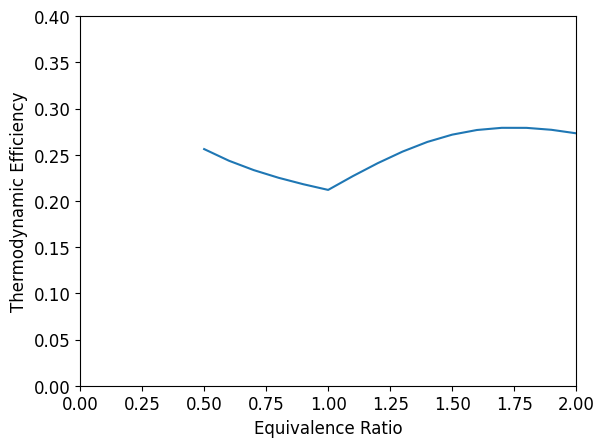

In [74]:
# CH4-O2 with no precompression
phi_vec = np.arange(.5,2.1,.1)
eta_vec = np.zeros(len(phi_vec))
for i in range(len(phi_vec)):
  # STATE 1
  gas = ct.Solution('gri30.yaml')
  P1 = 1*100000
  T1 = 300
  gas.TP = T1,P1
  phi = phi_vec[i]
  FUEL = 'CH4:1'
  OXID = 'O2:1'
  gas.set_equivalence_ratio(phi,FUEL,OXID)
  h1 = gas.enthalpy_mass
  s1 = gas.entropy_mass

  # STATE 3
  mech = 'gri30.yaml'
  [cj_speed,R2,plot_data] = CJspeed(P1,T1,gas.X,mech,fullOutput=True)
  U_CJ = cj_speed
  gas3 = PostShock_eq(U_CJ,P1,T1,gas.X,mech)
  T3 = gas3.T
  P3 = gas3.P
  s3 = gas3.entropy_mass
  h3 = gas3.enthalpy_mass

  # STATE 4
  P4 = P3
  T4 = T3
  s4 = s3

  # STATE 5
  P5 = P1
  gas3.SP = s4,P5
  gas3.equilibrate('SP')
  T5 = gas3.T
  h5 = gas3.enthalpy_mass

  # STATE 6
  T6 = T1
  P6 = P5
  gas3.TP = T6,P6
  gas3.equilibrate('TP')
  h6 = gas3.enthalpy_mass

  # EFFICIENCY CALCULATIONS
  w_net = h1-h5
  q_c = h1-h6
  eta = (w_net/q_c)
  eta_vec[i] = eta

plt.plot(phi_vec,eta_vec)
plt.ylim([0,.4])
plt.xlim([0,2])
plt.xlabel('Equivalence Ratio')
plt.ylabel('Thermodynamic Efficiency')

Iteration of CH4-O2 at 0.5*U_CJ with precompression

shk_calc did not converge for U =  1054.923642911123


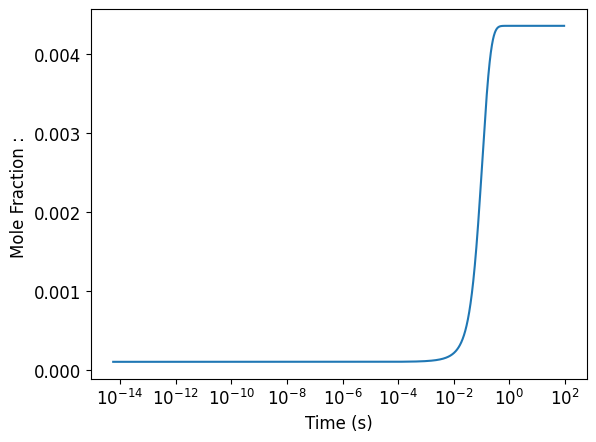

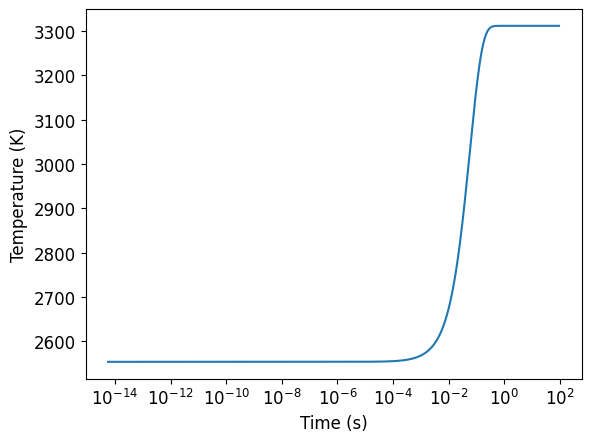

shk_calc did not converge for U =  1098.229564040972


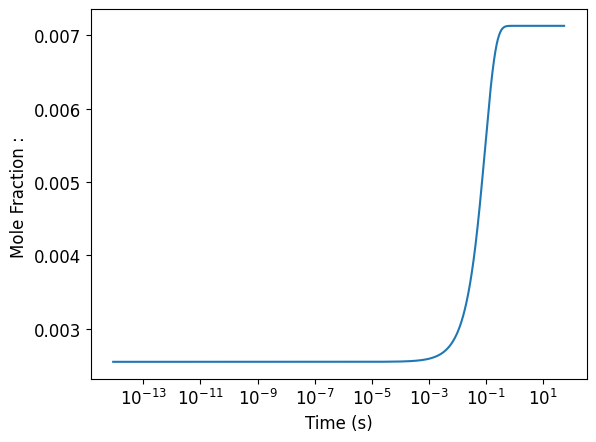

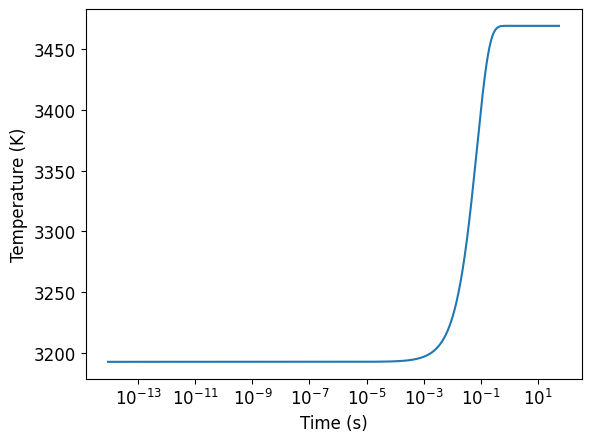

shk_calc did not converge for U =  1136.3545430442286


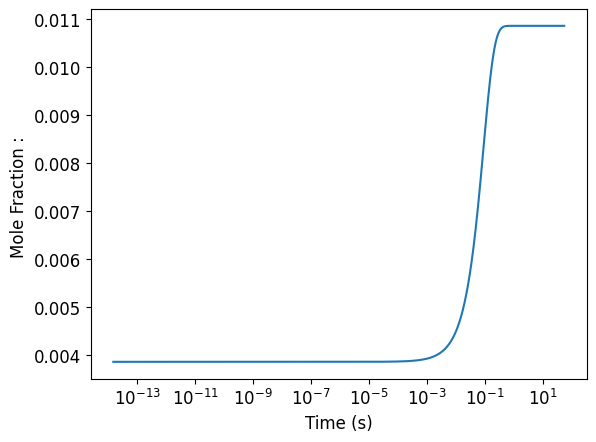

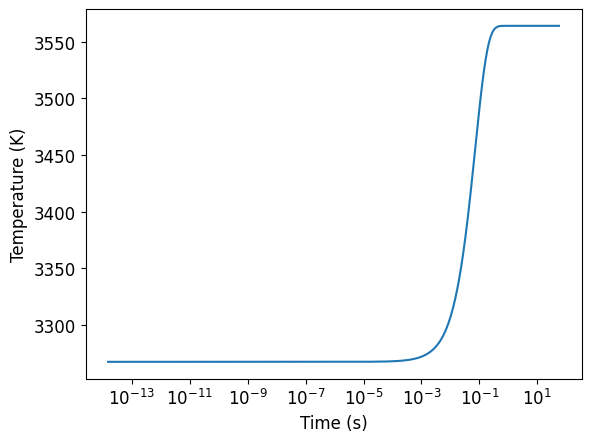

shk_calc did not converge for U =  1170.3611053890932


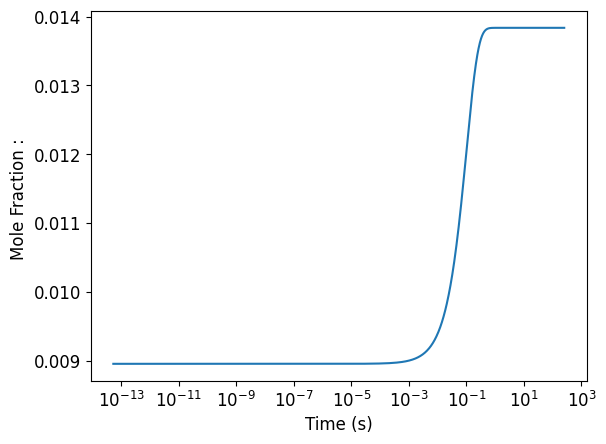

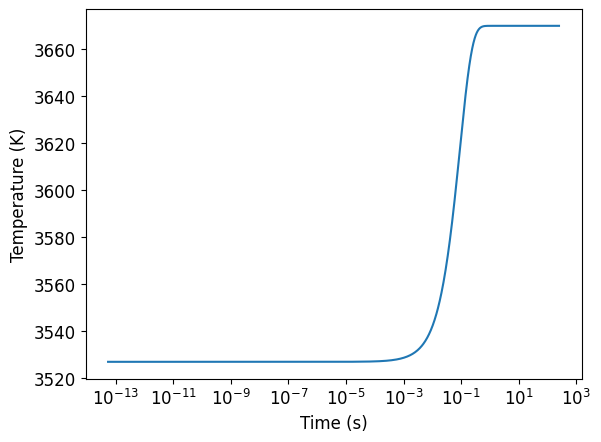

shk_calc did not converge for U =  1200.7900275309582


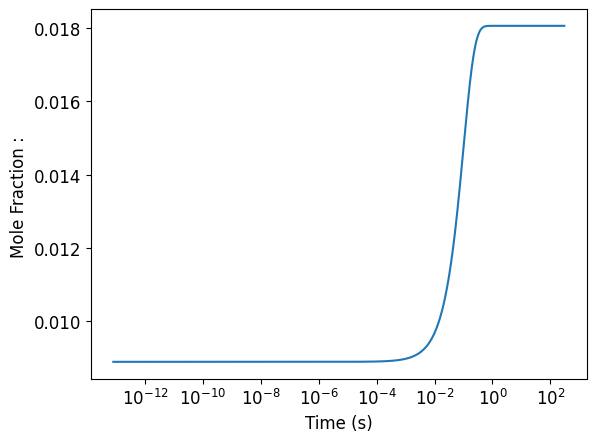

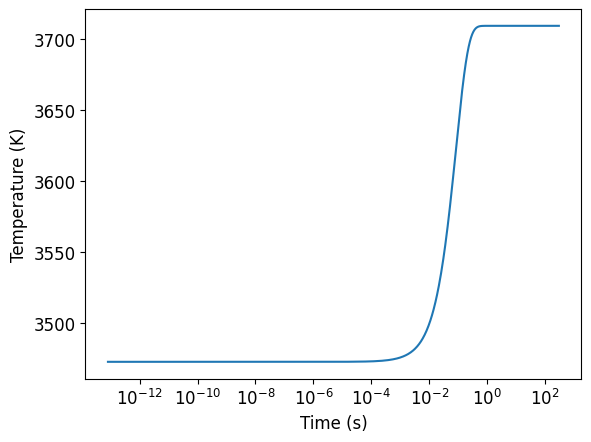

shk_calc did not converge for U =  1227.6231896796694


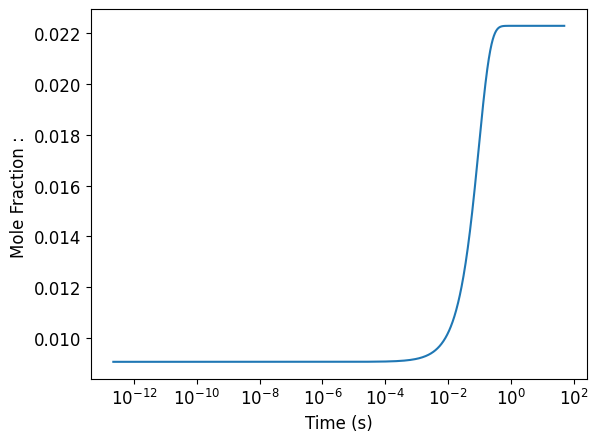

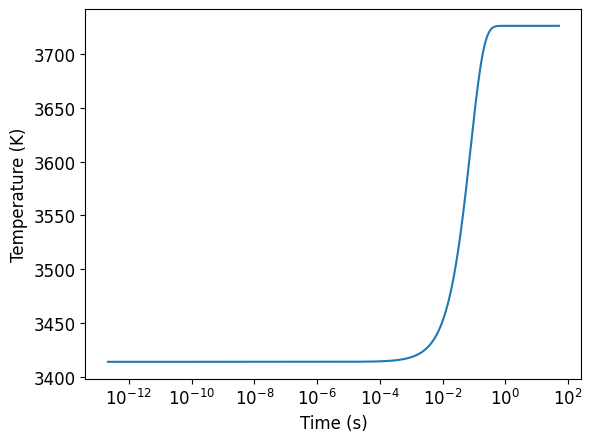

shk_calc did not converge for U =  1253.9654795297765


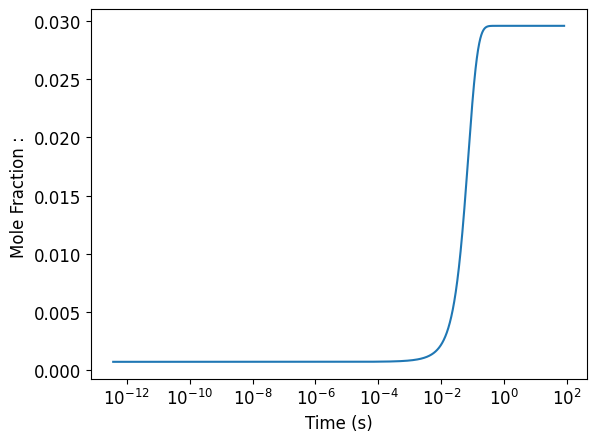

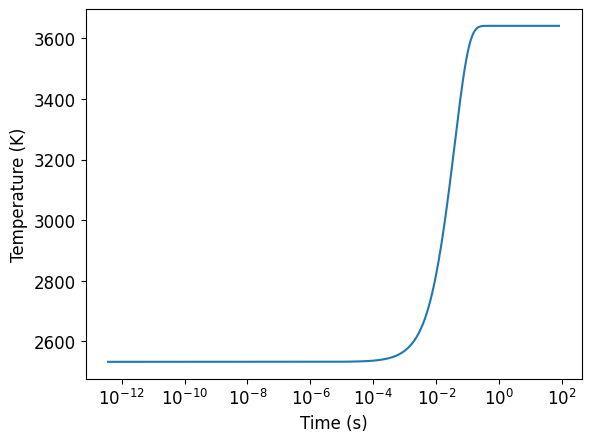

shk_calc did not converge for U =  1276.94944747725


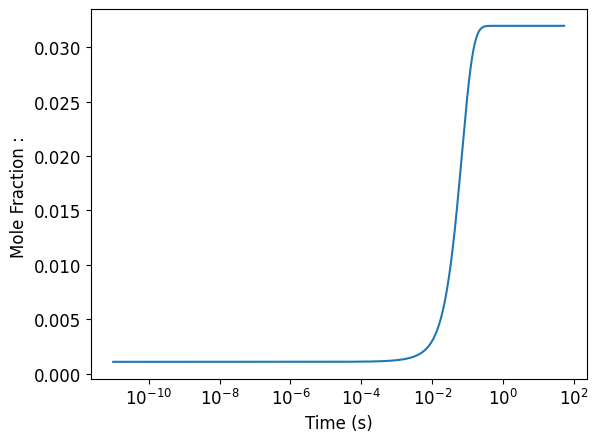

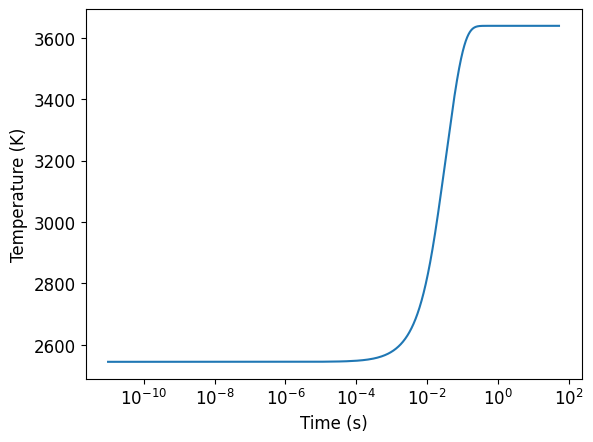

shk_calc did not converge for U =  1296.8156190851623


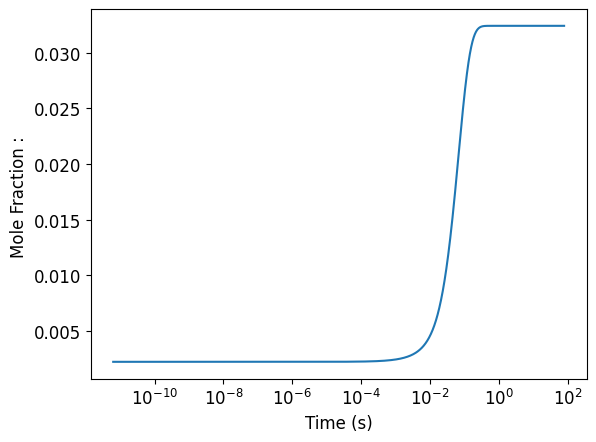

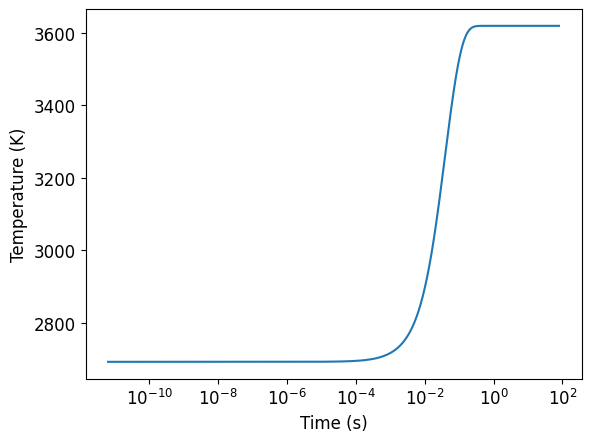

shk_calc did not converge for U =  1313.4650530202412


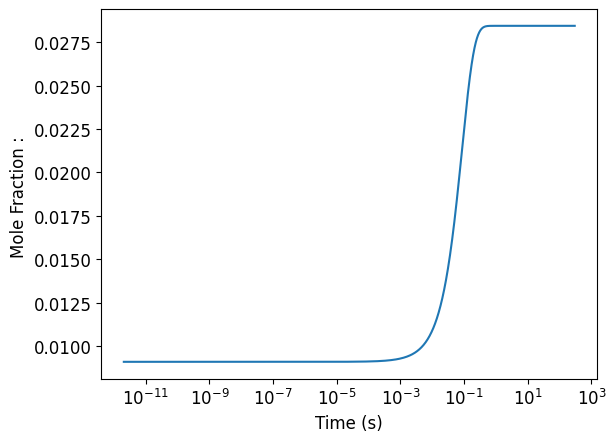

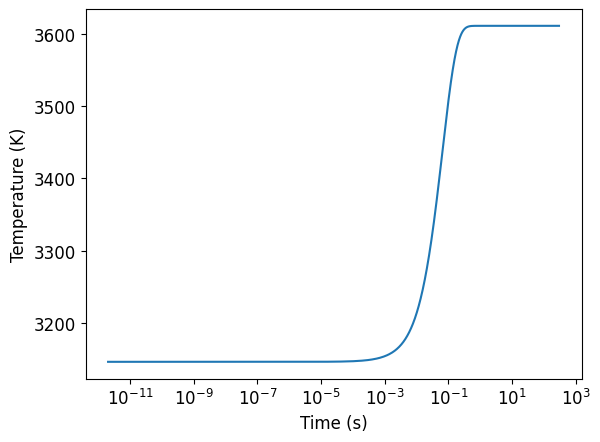

shk_calc did not converge for U =  1326.789717351191


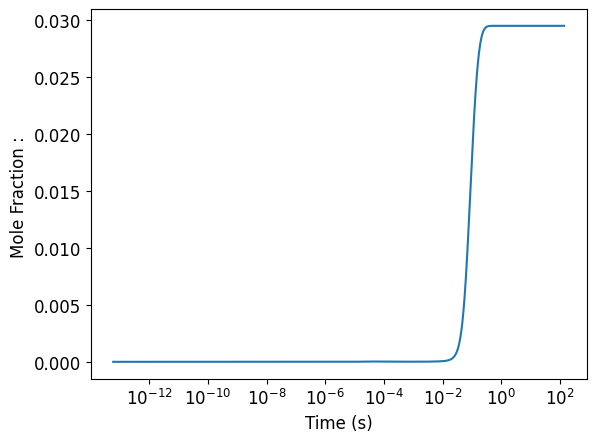

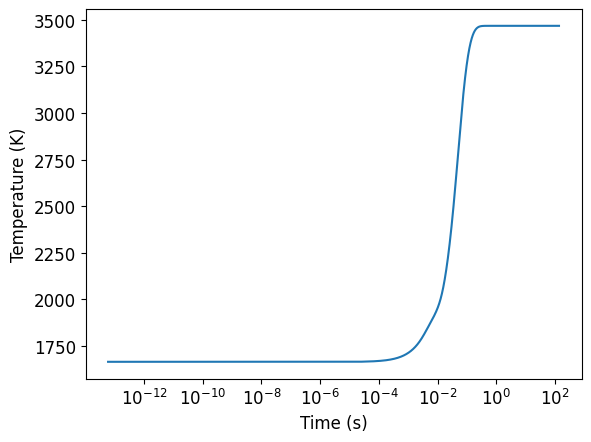

shk_calc did not converge for U =  1336.7431064237126


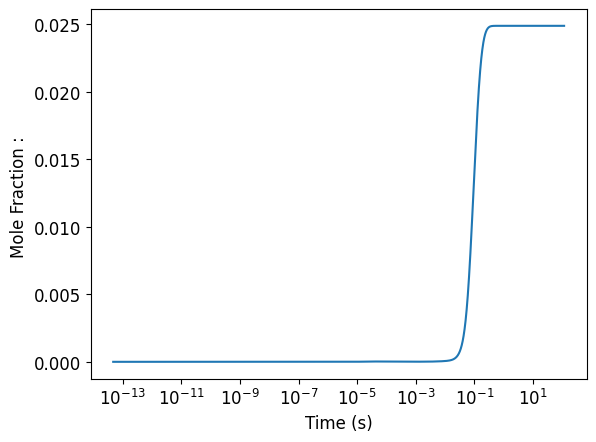

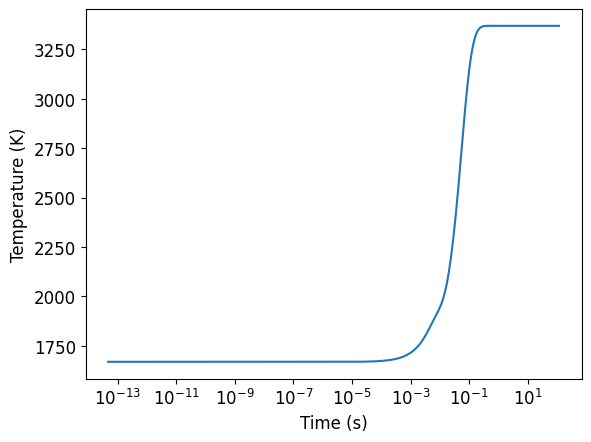

On Input species NNH          has a negative MF, setting it small
On Input species N2O          has a negative MF, setting it small
On Input species HCNN         has a negative MF, setting it small
On Input species N2           has a negative MF, setting it small
shk_calc did not converge for U =  1343.3759096379595


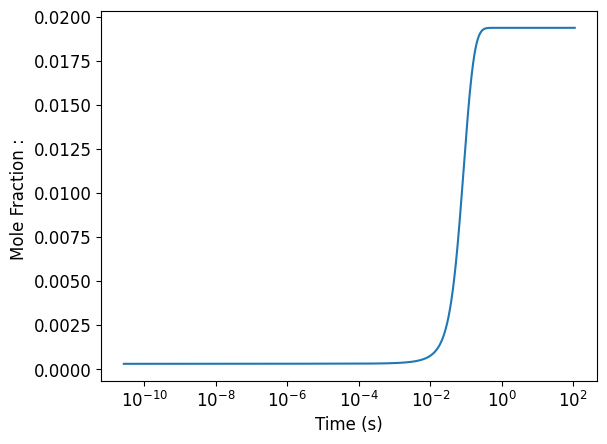

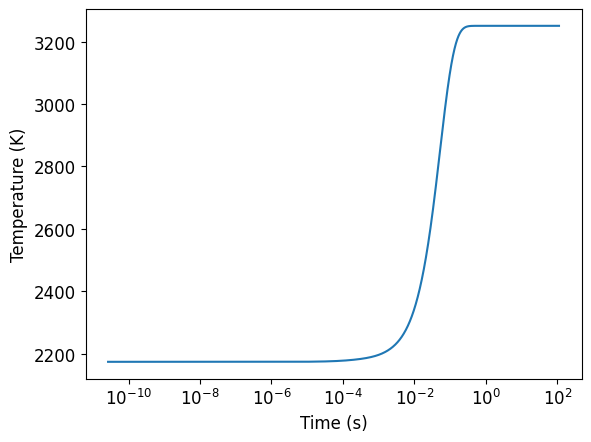

shk_calc did not converge for U =  1346.8286034848998


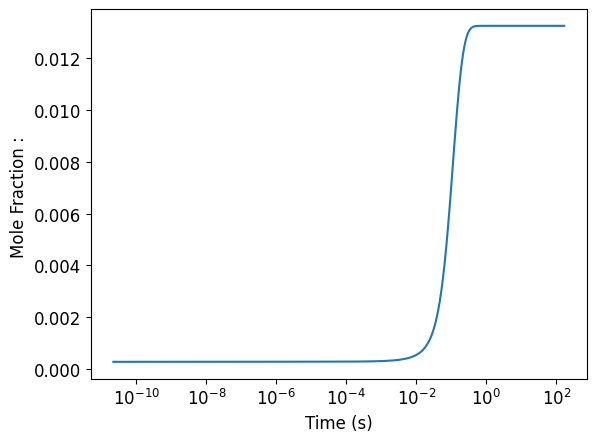

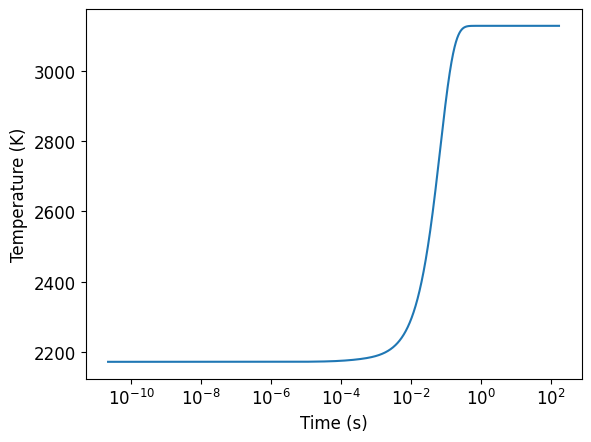

shk_calc did not converge for U =  1347.2969171158038


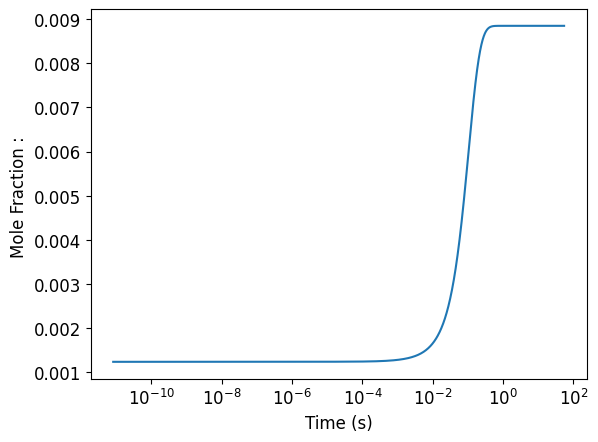

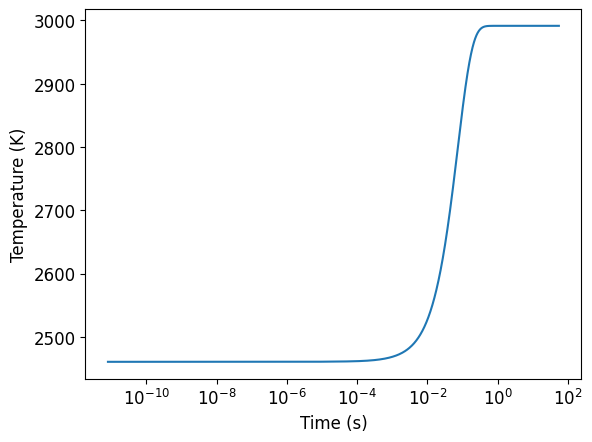

On Input species NNH          has a negative MF, setting it small
On Input species N2O          has a negative MF, setting it small
On Input species HCNN         has a negative MF, setting it small
On Input species N2           has a negative MF, setting it small
shk_calc did not converge for U =  1344.984072986473


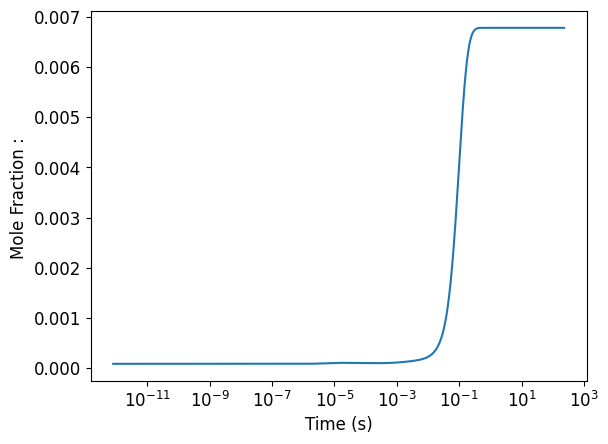

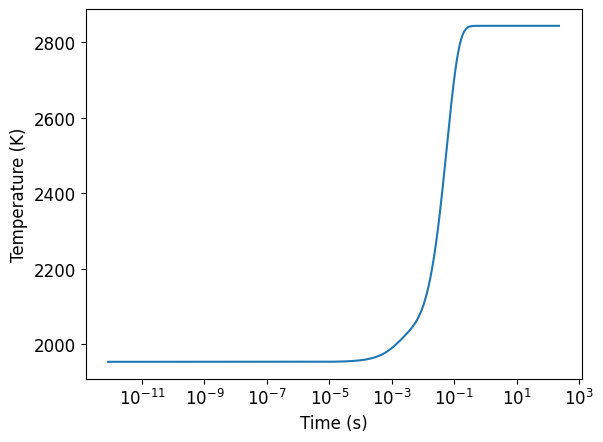

On Input species HCNN         has a negative MF, setting it small
On Input species N            has a negative MF, setting it small
On Input species NH           has a negative MF, setting it small
On Input species NH2          has a negative MF, setting it small
On Input species NH3          has a negative MF, setting it small
On Input species NNH          has a negative MF, setting it small
On Input species NO           has a negative MF, setting it small
On Input species NO2          has a negative MF, setting it small
On Input species N2O          has a negative MF, setting it small
On Input species HNO          has a negative MF, setting it small
On Input species CN           has a negative MF, setting it small
On Input species HCN          has a negative MF, setting it small
On Input species H2CN         has a negative MF, setting it small
On Input species HCNO         has a negative MF, setting it small
On Input species HOCN         has a negative MF, setting it small
On Input s

Text(0.5, 1.0, 'CH4-O2 at 0.5*U_{CJ}')

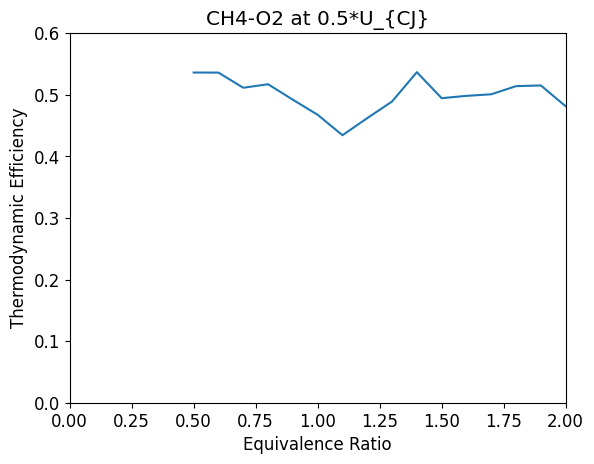

In [76]:
phi_vec = np.arange(.5,2.1,.1)
eta_vec = np.zeros(len(phi_vec))
for i in range(len(phi_vec)):
  # STATE 1
  gas = ct.Solution('gri30.yaml')
  P1 = 1*100000
  T1 = 300
  gas.TP = T1,P1
  phi = phi_vec[i]
  FUEL = 'CH4:1'
  OXID = 'O2:1'
  gas.set_equivalence_ratio(phi,FUEL,OXID)
  h1 = gas.enthalpy_mass
  s1 = gas.entropy_mass
  X1 = gas.X
  #gas()

  # STATE 2
  P2 = 10*100000
  gas.SP = s1,P2
  gas.equilibrate('SP')
  #gas()
  T2 = gas.T
  s2 = gas.entropy_mass

  # STATE 3
  mech = 'gri30.yaml'
  [cj_speed,R2,plot_data] = CJspeed(P2,T2,X1,mech,fullOutput=True)
  U_CJ = .5*cj_speed
  gas3 = PostShock_eq(U_CJ,P2,T2,X1,mech)
  #gas3()

  gas.SPX = s1,P2,X1
  fuel_ox_tank = ct.Reservoir(gas)
  exhaust = ct.Reservoir(gas3)
  stirred_reactor = ct.IdealGasMoleReactor(gas3, energy="on")

  mass_flow_controller = ct.MassFlowController(
  upstream=fuel_ox_tank,
  downstream=stirred_reactor,
  mdot=100,
  )
  pressure_regulator = ct.PressureController(
  upstream=stirred_reactor,
  downstream=exhaust,
  primary=mass_flow_controller,
  K=1e-3,
  )

  reactor_network = ct.ReactorNet([stirred_reactor])
  time_history = ct.SolutionArray(gas, extra=["t"])
  max_simulation_time = 50 # seconds
  t = 0
  while t < max_simulation_time:
    t = reactor_network.step()
    time_history.append(stirred_reactor.thermo.state, t=t)

  plt.figure()
  plt.semilogx(time_history.t, time_history("H").X, "-")
  plt.xlabel("Time (s)")
  plt.ylabel("Mole Fraction : ")
  plt.show()
  plt.figure()
  plt.semilogx(time_history.t,time_history.T)
  plt.xlabel("Time (s)")
  plt.ylabel("Temperature (K)")
  plt.show()

  T3 = time_history.T[-1]
  P3 = time_history.P[-1]
  s3 = time_history.entropy_mass[-1]
  h3 = time_history.enthalpy_mass[-1]
  gas3.TP = T3,P3
  #gas3()

  # STATE 4
  P4 = P3
  T4 = T3
  s4 = s3

  # STATE 5
  P5 = P1
  gas3.SP = s4,P5
  gas3.equilibrate('SP')
  #gas3()
  T5 = gas3.T
  h5 = gas3.enthalpy_mass

  # STATE 6
  T6 = T1
  P6 = P5
  gas3.TP = T6,P6
  gas3.equilibrate('TP')
  #gas3()
  h6 = gas3.enthalpy_mass

  # EFFICIENCY CALCULATIONS
  w_net = h1-h5
  q_c = h1-h6
  eta = (w_net/q_c)
  eta_vec[i] = eta

plt.plot(phi_vec,eta_vec)
plt.ylim([0,.6])
plt.xlim([0,2])
plt.xlabel('Equivalence Ratio')
plt.ylabel('Thermodynamic Efficiency')
plt.title('CH4-O2 at 0.5*U_{CJ}')